<div style="text-align: right"> 13.12.2019</div>

***Name:*** 

# Hausaufgabe Blatt 8

## Rollen: Schiefe Ebene 

Wir betrachten einen Zylinder mit Radius $R$, Masse $m$ und Kreismittelpunkt $M$. Wir wollen die Bewegung des Zylinders entlang einer schiefen Ebene berechnen und visualisieren. Die schiefe Ebene hat einen Neigungswinkel $\theta = 12^{\circ}$. Der Startpunkt des Zylinders befinde sich $h_0=1$ über dem Boden.


<img src="./rollingPlane.png" alt="rollingPlane" width="300"/>

Die Höhe $h$ nach der auf der Ebene zurückgelegten Strecke $l$ beträgt
$$
h = h_0 - l \sin \theta
$$

und somit gilt für die potentielle Energie:
$$
E_{\mathrm{pot}} = m g (h_0 - l \sin \theta).
$$

Die kinetische Energie setzt sich zusammen aus der Translationsenergie $E_\mathrm{trans}=\frac{1}{2}mv^2 = \frac{1}{2}m\omega^2 R^2$ und der Rotationsenergie um die Hauptrotationsachse $E_\mathrm{rot}=\frac{1}{2}I\omega^2$, wobei $I$ das Trägheitsmoment des Zylinders bezüglich seiner Hauptrotationsachse ist
$$
E_\mathrm{kin}= E_\mathrm{trans} + E_\mathrm{rot} = \frac{1}{2}\left(I+mR^2\right)\omega^2.
$$

Die potentielle Energie wird beim Rollen in kinetische Energie umgesetzt. Es gilt also nach zurückgelegter Strecke $l$
$$
 m g l \sin \theta = \frac{1}{2}\left(I+mR^2\right)\omega^2.
 $$
 
**a)** Nehmen Sie an, es handle sich um einen Vollzylinder mit der Masse $m=1$ und einem Radius $R=0.1$.
Plotten Sie die Geschwindigkeit $v$ des Mittelpunktes $M$ in Abhängigkeit von der zurückgelegten Strecke $l$.

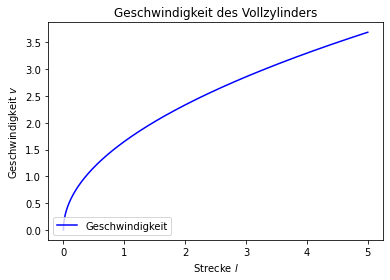

In [12]:
import numpy as np # lade Bibliotheken
import matplotlib.pyplot as plt

#Definiere Variablen
R = 0.1
m = 1
h0 = 1
g = 9.81
theta = 12*2*np.pi/360 ##Bogenmaß!!
sintheta = 0.2079

I=0.5*m*R**2 ##am besten Trägheitsmoment auch definieren um Nebenrechnungen zu vermeiden

#Diagramm plotten
fig, ax = plt.subplots()
ax.set_title("Geschwindigkeit des Vollzylinders")  # Titel

#l = np.linspace(0, 10) #np.linspace für die Strecke l auf der x-Achse
"""
linspace wird eigentlich so verwendet : np.linspace(lmin,lmax,zahl der Einträge)
"""
l = np.linspace(0,5,1000)

#v = np.sqrt(g * l * sintheta / (1.25 * R)) 
"""
Hier stimmt etwas nicht...
v sollte wie folgt berechnet werden:
"""
v=np.sqrt((2*R**2*m*g*l*np.sin(theta))/(I+m*R**2))

# Formel für v(l), berechnet aus m*g*l*sintheta = 0.5*(I + m*R**2)*omea**2, mit omega = v/R und I = 0.5*m*R**2

#Plot
ax.plot(l, v, label='Geschwindigkeit', color='blue') 

ax.set_xlabel("Strecke $l$")
ax.set_ylabel("Geschwindigkeit $v$")



plt.legend(loc=3)
plt.show()

**b)** Plotten Sie die $y$-Komponente des Punktes $A$ gegen die Zeit $t$ im mit dem Mittelpunkt M translatierenden Koordinatensystem. Plotten Sie ebenfalls die Bahnkurve (also $x(t)$ gegen $y(t)$) des Mittelpunkts $M$ und die Bahnkurve des Punktes $A$ im ruhenden Bezugssystem. Hinweis: Die Situation hier ähnelt Übungsblattaufgabe Nr. 2.5.

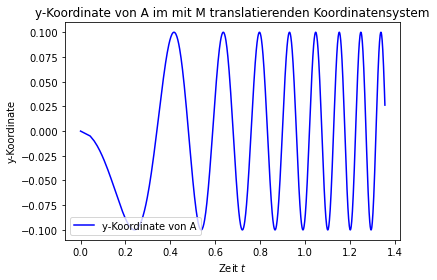

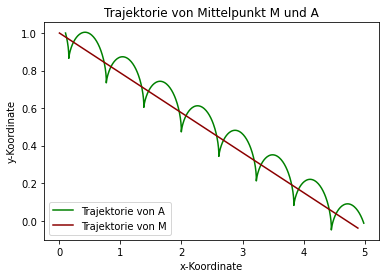

In [18]:
import numpy as np # lade Bibliotheken
import matplotlib.pyplot as plt

# Hilfe zur Berechnung von t:
t = np.zeros_like(v) # hier ist v die vorher berechnete Geschwindigkeit v
t[1:] = l[1:] / v[1:] # Berechnung der Zeit; l ist die zurückgelegte Distanz wie in der Aufgabenstellung beschrieben
# Diese Art auf arrays zuzugreifen nennt man *slicing*. 

#Definiere Variablen
##hast du schon oben
#R = 0.1
#m = 1
#h0 = 1
#g = 9.81

#theta = 12 #Grad
#theta = 0.20944 #im Bogenmaß
#sintheta = 0.2079

# Berechne die Koordinaten x und y von M in Abhängigkeit von l und theta
"""
l und v hast du vorher schon ausgerechnet
"""
#l = np.linspace(0, 10) #np.linspace für die Strecke l auf der x-Achse
#v = np.sqrt(g * l * sintheta / (1.25 * R)) # Formel für v(l)


"""
brauchst du nicht
"""
#vx = v * np.cos(theta)
#vy = v * np.sin(theta)
#xm = vx * np.cos(theta) * l
#ym = - vy *np.sin(theta)* l +h0

# Berechne die Koordinaten des Punkts A im mit dem Mittelpunkt M translatierenden Koordinatensystem abhängig von R, omega und t
#omega = np.sqrt((4*g*v*t*sintheta)/3*R**2) #berechnet aus m*g*l*sintheta = 0.5*(I + m*R**2)*omea**2

"""
geht viel einfacher (und Formel scheint falsch zu sein): (warum das minuszeichen weiß ich grad leider auch nicht :( )
"""
omega = -v/R
#xam = R * (omega*t + np.sin(omega * t)) + R #x-Koordinate, x(t=0)=R
#yam = R * (np.cos(omega * t + 0.5*np.pi))#y-Koordinate mit, y(t=0)=0

"""
stimmt so nicht..
"""
xam = R*np.cos(omega*t)
yam = R*np.sin(omega*t)

# Berechne die Koordinaten x und y von M in Abhängigkeit von l und theta
x = l * np.cos(theta)
y = h0 - l * np.sin(theta)

# Berechne aus den Koordinaten x und y und aus den Koordianten des Punkts A im mit dem Mittelpunkt M translatierenden Koordinatensystem
# die Koordinaten des Punkts A im ruhenden Bezugssystem (Tipp: Addition)
xa = xam + x
ya = yam + y

##########
# Plotte y-Koordinate des Punkts A im mit dem Punkt M tanslatierenden Koordinatensystem 

fig, ax = plt.subplots()
ax.set_title("y-Koordinate von A im mit M translatierenden Koordinatensystem")  # Titel

#Plot
ax.plot(t, yam, label='y-Koordinate von A', color='blue') 

ax.set_xlabel("Zeit $t$")
ax.set_ylabel("y-Koordinate")

plt.legend(loc=3)
plt.show()


##########
# Plotte Trajektorie von Mittelpunkt M und Punkt A
fig, ax = plt.subplots()
ax.set_title("Trajektorie von Mittelpunkt M und A")  # Titel

#Plot
ax.plot(xa, ya, label='Trajektorie von A', color='green') ###Vermutlich mit Fehler in den Formeln, die Trajektorien liegen direkt übereinander und passen nicht gut zur Aufgabenstellung.
ax.plot(x, y, label='Trajektorie von M', color='darkred') 

ax.set_xlabel("x-Koordinate")
ax.set_ylabel("y-Koordinate")

plt.legend(loc=3)
plt.show()
